# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import configparser
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("news_api")
config= configparser.ConfigParser()
config.read("config.py")

['config.py']

In [4]:
fig=config['simple value']['news_api']

In [5]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=fig)

In [6]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

bitcoin_news= newsapi.get_everything(q='Bitcoin', language='en', sort_by='relevancy')
bitcoin_news["totalResults"]



8124

In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_news= newsapi.get_everything(q='Ethereum', language='en', sort_by='relevancy')
eth_news["totalResults"]

3420

In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bit_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bit_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bit_df = pd.DataFrame(bit_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bit_df = bit_df[cols]

bit_df.head()

,date,text,compound,positive,negative,neutral
0,2021-12-06,The plant opening northeast of Niagara Falls t...,0.0000,0.000,0.0,1.000
1,2021-12-01,"Earlier this year, Nothing released a pair of ...",0.5106,0.099,0.0,0.901
2,2021-11-22,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",0.0000,0.000,0.0,1.000
3,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.0,0.847
4,2021-11-22,Posted \r\nAfter becoming the first country to...,0.4767,0.136,0.0,0.864


In [9]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-19,"If you claim ownership, someone will probably ...",0.7783,0.216,0.000,0.784
1,2021-11-24,More than $1.2 million has already been spent ...,0.0000,0.000,0.000,1.000
2,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.000,0.847
3,2021-11-23,Ethereum has been on a tear this year. Its out...,0.6542,0.178,0.000,0.822
4,2021-12-02,Blockchain startup MonoX Finance said on Wedne...,-0.0516,0.074,0.079,0.847


In [10]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bit_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.099135,0.043900,0.016200,0.939900
std,0.305228,0.065594,0.029573,0.068112
min,-0.381800,0.000000,0.000000,0.791000
25%,0.000000,0.000000,0.000000,0.891750
50%,0.000000,0.000000,0.000000,0.957000
75%,0.463275,0.108250,0.010750,1.000000
max,0.571900,0.158000,0.080000,1.000000


In [11]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.250890,0.084150,0.02620,0.889550
std,0.316803,0.070344,0.03871,0.079778
min,-0.318200,0.000000,0.00000,0.729000
25%,0.000000,0.032250,0.00000,0.831750
50%,0.248950,0.075000,0.00000,0.910500
75%,0.429075,0.121500,0.06200,0.945250
max,0.817600,0.221000,0.11500,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Eth

Q: Which coin had the highest compound score?

A: Eth

Q. Which coin had the highest positive score?

A: Eth

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

# Expand the default stopwords list if necessary
stopwords = sw.union(sw_addons)

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in stopwords]
    
    return output

In [17]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bit_df['words_tokenized'] = bit_df['text'].apply(tokenizer)
bit_df.head()

,date,text,compound,positive,negative,neutral,words_tokenized
0,2021-12-06,The plant opening northeast of Niagara Falls t...,0.0000,0.000,0.0,1.000,"[plant, opening, northeast, niagara, falls, mo..."
1,2021-12-01,"Earlier this year, Nothing released a pair of ...",0.5106,0.099,0.0,0.901,"[earlier, year, nothing, released, pair, relat..."
2,2021-11-22,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",0.0000,0.000,0.0,1.000,"[mizata, el, salvadorlondon, nov, reuters, el,..."
3,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.0,0.847,"[keeping, previous, announcement, amc, theater..."
4,2021-11-22,Posted \r\nAfter becoming the first country to...,0.4767,0.136,0.0,0.864,"[posted, becoming, first, country, accept, cry..."


In [18]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df['words_tokenized'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,words_tokenized
0,2021-11-19,"If you claim ownership, someone will probably ...",0.7783,0.216,0.000,0.784,"[claim, ownership, someone, probably, want, ta..."
1,2021-11-24,More than $1.2 million has already been spent ...,0.0000,0.000,0.000,1.000,"[million, ha, already, spent, gas, feesone, re..."
2,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.000,0.847,"[keeping, previous, announcement, amc, theater..."
3,2021-11-23,Ethereum has been on a tear this year. Its out...,0.6542,0.178,0.000,0.822,"[ethereum, ha, tear, year, outperformed, bitco..."
4,2021-12-02,Blockchain startup MonoX Finance said on Wedne...,-0.0516,0.074,0.079,0.847,"[blockchain, startup, monox, finance, wednesda..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
bigram_counts = Counter(ngrams(bit_df, n=2))
print(dict(bigram_counts))

{('date', 'text'): 1, ('text', 'compound'): 1, ('compound', 'positive'): 1, ('positive', 'negative'): 1, ('negative', 'neutral'): 1, ('neutral', 'words_tokenized'): 1}


In [22]:
# Generate the Ethereum N-grams where N=2
bigram_counts = Counter(ngrams(eth_df, n=2))
print(dict(bigram_counts))

{('date', 'text'): 1, ('text', 'compound'): 1, ('compound', 'positive'): 1, ('positive', 'negative'): 1, ('negative', 'neutral'): 1, ('neutral', 'words_tokenized'): 1}


In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [25]:
# Use token_count to get the top 10 words for Bitcoin
token_count(tokenizer(bit_df['text'].str.cat()), N=10)

[('bitcoin', 16),
 ('world', 7),
 ('cryptocurrency', 6),
 ('reuters', 5),
 ('first', 5),
 ('company', 4),
 ('el', 4),
 ('billion', 4),
 ('ha', 4),
 ('project', 3)]

In [26]:
# Use token_count to get the top 10 words for Ethereum
token_count(tokenizer(eth_df['text'].str.cat()), N=10)

[('ha', 8),
 ('year', 6),
 ('bitcoin', 5),
 ('cryptocurrency', 4),
 ('copy', 3),
 ('finance', 3),
 ('us', 3),
 ('ear', 3),
 ('earbuds', 3),
 ('company', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

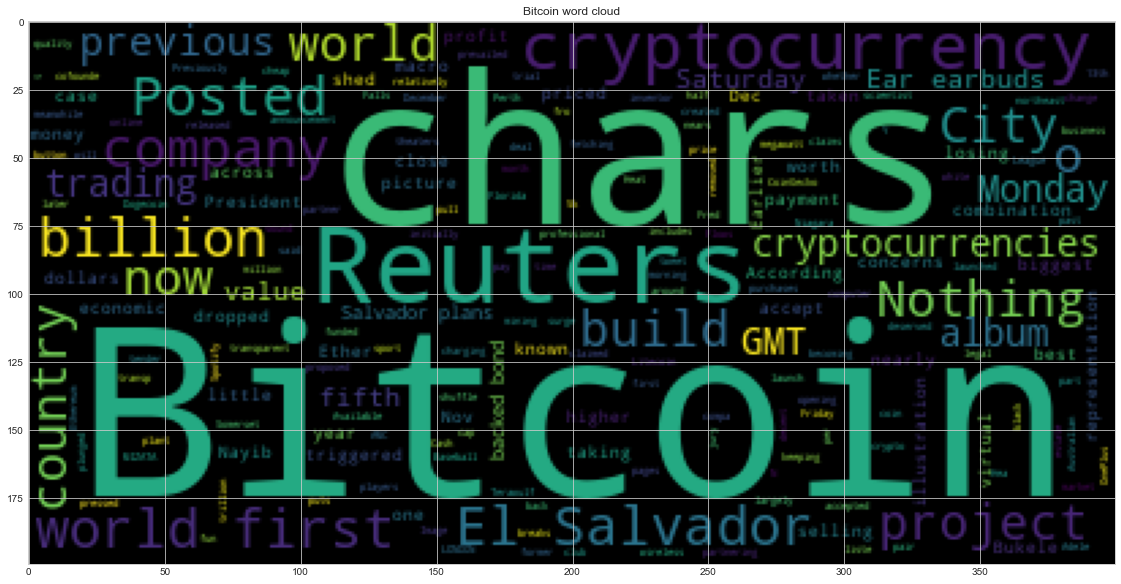

In [29]:
# Generate the Bitcoin word cloud
def wordcloud(text, title):
    wc = WordCloud().generate(text)
    plt.imshow(wc)
    plt.title(title)
    plt.show()
    
wordcloud(bit_df['text'].str.cat(), "Bitcoin word cloud")

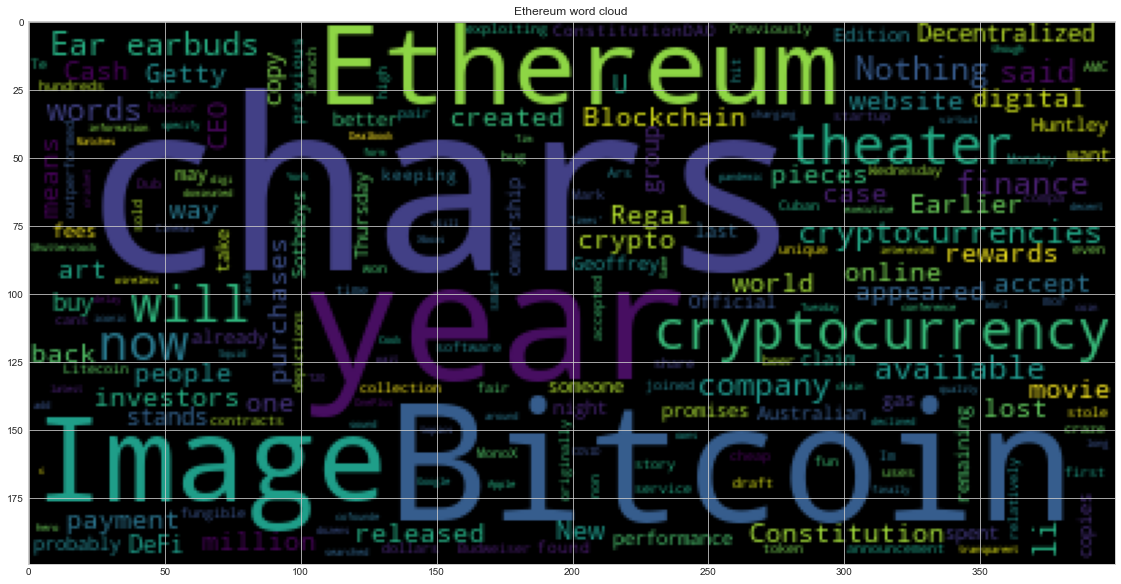

In [30]:
# Generate the Ethereum word cloud
wordcloud(eth_df['text'].str.cat(), "Ethereum word cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [31]:
import spacy
from spacy import displacy

In [32]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [33]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [34]:
# Concatenate all of the Bitcoin text together
bit_text = bit_df['text'].str.cat()

In [35]:
# Run the NER processor on all of the text
bitdoc = nlp(bit_text)

# Add a title to the document
bitdoc.user_data["title"] = "Bitcoin NER"

In [36]:
# Render the visualization
displacy.render(bitdoc, style = 'ent', jupyter=True)

In [37]:
# List all Entities
for ent in bitdoc.ents:
    print(ent.text, ent.label_)

Niagara Falls PERSON
this month DATE
Somerset GPE
N.Y. GPE
$550 million MONEY
Terawulf PERSON
150-megawatt QUANTITY
this year DATE
99 MONEY
1 CARDINAL
OnePlus ORG
El Salvador GPE
LONDON GPE
Nov 22 DATE
Reuters ORG
El Salvador GPE
first ORDINAL
Bitcoin City WORK_OF_ART
$1 billion MONEY
Nayib Bukele PERSON
AMC ORG
first ORDINAL
El Salvador GPE
first ORDINAL
Bitcoin City GPE
99 MONEY
December 13th DATE
Ear 1 PRODUCT
Nothings Ear 1 PERSON
earlier this year DATE
Monday DATE
Florida GPE
half CARDINAL
Adele PERSON
30 CARDINAL
7% PERCENT
Monday DATE
morning TIME
around $66,105 MONEY
3% PERCENT
4,722 MONEY
over 9% PERCENT
Baseball League ORG
Perth Heat ORG
first ORDINAL
Hea PERSON
4 CARDINAL
Reuters ORG
8.4% PERCENT
49,228.82 MONEY
20:01 GMT TIME
Saturday DATE
4,514.87 MONEY
28.7% PERCENT
fifth ORDINAL
Saturday DATE
nearly a billion dollars MONEY
fifth ORDINAL
Saturday DATE
nearly a billion dollars MONEY
3 CARDINAL
Reuters ORG
5.5% PERCENT
53,435.9 MONEY
22:04 GMT TIME
Friday DATE
3,112.06 MONE

---

### Ethereum NER

In [38]:
# Concatenate all of the Ethereum text together
eth_text = eth_df['text'].str.cat()

In [39]:
# Run the NER processor on all of the text
ethdoc = nlp(eth_text)

# Add a title to the document
ethdoc.user_data["title"] = "Ethereum NER"

In [40]:
# Render the visualization
displacy.render(ethdoc, style = 'ent', jupyter=True)

---

In [42]:
# List all Entities
for ent in ethdoc.ents:
    print(ent.text, ent.label_)

this year DATE
Australian Geoffrey Huntley ORG
One CARDINAL
13 CARDINAL
the Official Edition of the Constitution LAW
Sothebys
 NORP
last Thursday DATE
night TIME
ConstitutionDAO PERSON
AMC ORG
this year DATE
this year DATE
Mark Cuban PERSON
MonoX Finance ORG
Wednesday DATE
stole $31 million MONEY
Monday DATE
Budweiser PERSON
first ORDINAL
hundreds of dollars MONEY
this year DATE
99 MONEY
1 CARDINAL
OnePlus ORG
Tim Cook PERSON
The New York Times' ORG
Tuesday DATE
Regal Cinemas PERSON
more than 500 CARDINAL
dozens CARDINAL
Google ORG
2021 DATE
Worl PERSON
year-long DATE
Xboxs ORG
Michael SaylorJoe Raedle PERSON
ETF ORG
1-2% PERCENT
99 MONEY
December 13th DATE
Ear 1 PRODUCT
Nothings Ear 1 PERSON
earlier this year DATE
almost 20 per cent MONEY
less than two weeks DATE
DeFi GPE
Ethereum PERSON
DeFi GPE
the British Institute of Verbatim ORG
Getty Images ORG
US GPE
nearly 20 CARDINAL
TB ORG
NFT ORG
